# PRACTICA EVALUACIÓN FINAL - PARTE II #
Esta segunda parte supone el 25% restante de tarea práctica final del módulo de minería de datos. Junto con la parte 1, ambas puntúan el 60% de la nota final.

En esta parte 2 se pretende evaluar los conceptos relacionados con el analisis de series temporales y su aplicación a modelos de predicción.

Comenzando con esta parte de la práctica, en el primer bloque de código, conviene cargar las librerías que se van a utilizar a lo largo del notebook.

In [67]:
# importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.stats import boxcox
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

En el siguiente paso procedemos a cargar el fichero *Microsoft_Stock.csv* que servirá como conjunto de datos para llevar a cabo toda la evaluación de esta parte II. Se trata de un fichero en el que cada registro contiene para un día concreto datos de apertura, cierre, máximo, mínimo y volumen de cotización de las acciones de Microsoft en la bolsa de Nueva York. Se trata por tanto de un clásico problema de predicción de valores futuros. 

In [68]:
# Cargar el fichero de datos en un DataFrame
data  = pd.read_csv('Datos/Microsoft_Stock.csv')


En los siguientes bloques de código el alumno debe programar las sentencias de código que considere oportunas para hacerse una idea general de los datos y de las variables. Visualización de datos, gráficos, etc. Los bloques son orientativos, el alumno puede añadir cuantos considere y codificarlos según su criterio.

In [69]:
# Mostrar los 10 primeros registros
data.head(10)

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
5,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861
6,4/10/2015 16:00:00,41.63,41.95,41.41,41.72,28022002
7,4/13/2015 16:00:00,41.40,42.06,41.39,41.76,30276692
8,4/14/2015 16:00:00,41.80,42.03,41.39,41.65,24244382
9,4/15/2015 16:00:00,41.76,42.46,41.68,42.26,27343581


In [70]:
# Describir el DataFrame
data.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [71]:
# Mostrar las columnas y tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [72]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [73]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


Se ha de filtrar la serie quedandose solo con los datos desde el año 2020 (incluido) en adelante. Una vez filtrada, mostrar la serie temporal de la variable ***Close*** en un gráfico de línea.

In [74]:
# Filtrar datos desde 2020
data_2020 = data[data['Date']>='2020-01-01'].reset_index(drop=True)
data_2020.head()

,Date,Open,High,Low,Close,Volume
0,2020-01-02 16:00:00,158.78,160.73,158.33,160.62,22634546
1,2020-01-03 16:00:00,158.32,159.95,158.06,158.62,21121681
2,2020-01-06 16:00:00,157.08,159.10,156.51,159.03,20826702
3,2020-01-07 16:00:00,159.32,159.67,157.32,157.58,21881740
4,2020-01-08 16:00:00,158.93,160.80,157.95,160.09,27762026


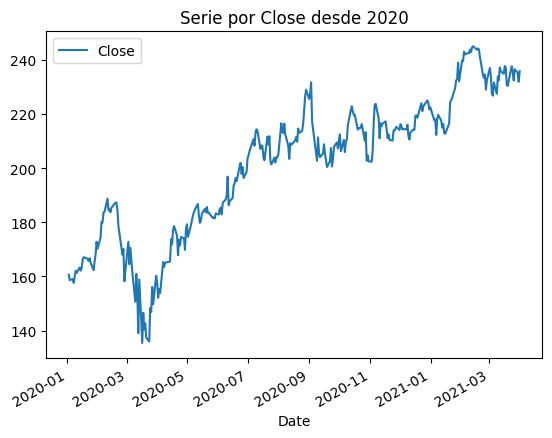

In [95]:
data_2020.plot(x= 'Date', y = 'Close')
plt.title("Serie por Close desde 2020")
plt.show()

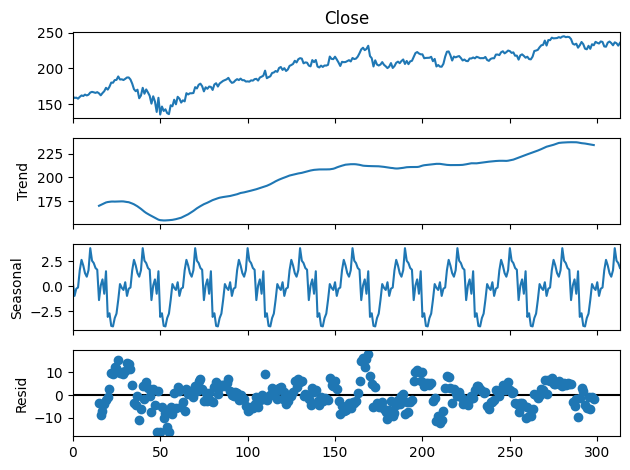

In [96]:
data_decomposed = seasonal_decompose(data_2020['Close'], model='additive', period=30)
data_decomposed.plot()
plt.show()

C:\Users\pauri\AppData\Local\Temp\ipykernel_30236\1994920294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_close['Trend']= data_close['Close'].rolling(window=30, center=True).mean()
C:\Users\pauri\AppData\Local\Temp\ipykernel_30236\1994920294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_close['Seasonality']= data_decomposed.seasonal
C:\Users\pauri\AppData\Local\Temp\ipykernel_30236\1994920294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

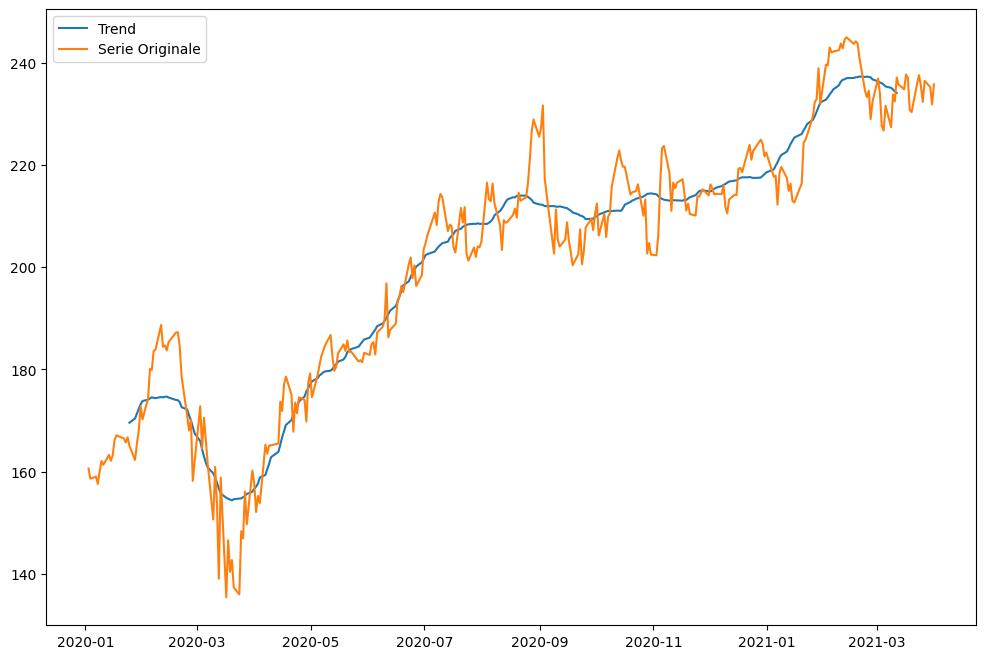

In [98]:
data_close = data_2020[['Close','Date']]
data_close['Trend']= data_close['Close'].rolling(window=30, center=True).mean()
data_close['Seasonality']= data_decomposed.seasonal
data_close['Residual']= data_decomposed.resid
plt.figure(figsize=(12, 8))
plt.plot(data_close['Date'], data_close['Trend'], label='Trend')
plt.plot(data_close['Date'], data_close['Close'], label='Serie Originale')
plt.legend()
plt.show()

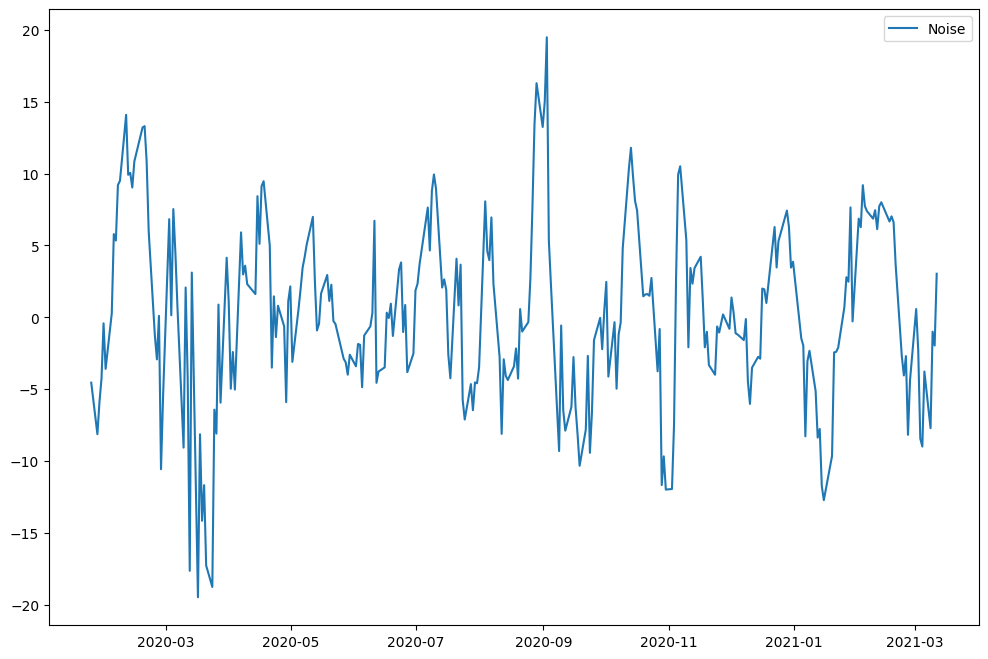

In [100]:
data_close_sin_na = data_close.dropna()
data_close_sin_na = data_close['Close'] - data_close['Trend']
plt.figure(figsize=(12, 8))
plt.plot(data_close['Date'], data_close_sin_na, label='Noise')
plt.legend()
plt.show()

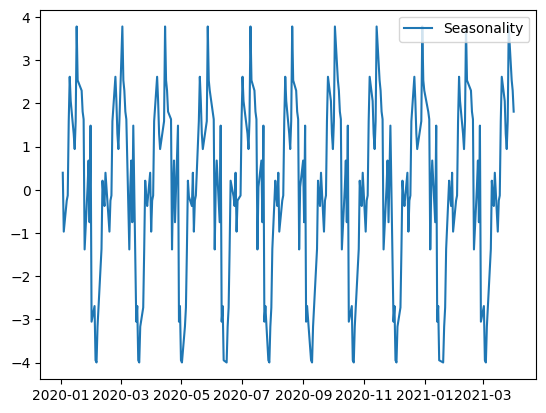

In [101]:
plt.plot(data_close['Date'], data_close['Seasonality'], label='Seasonality')
plt.legend()
plt.show()

### Pregunta 1 ###
En primera instancia echando un vistazo a la serie en la gráfica, ¿Qué pinta tiene la serie en cuanto a estacionariedad? Describe brevemente las impresiones acerca de porque parece que la serie es o no estacionaria.

***Respuesta:***

Parece que la serie no tiene estacionariedad, pues no encontramos ningún patrón de comportamiento a lo largo del tiempo, solo una tendencia creciente, con una pequeña caida en 2020-03. Es cierto, que podria cambiar la estacionariedad de la serie en caso de que pillaramos más años de analisis.

A continuación pasamos a analizar desde un punto de vista más formal la estacionariedad de la serie. En primer lugar calcular las funciones de autocorrelación y autocorrelación parcial y mostrar las gráficas con ambas funciones.

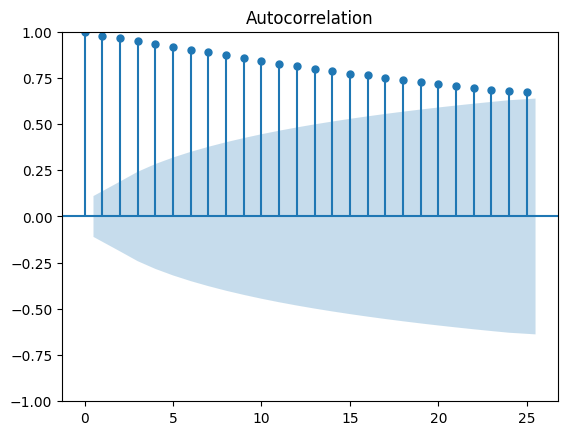

In [102]:
# Gráfica ACF
ACF = plot_acf(data_close['Close'])

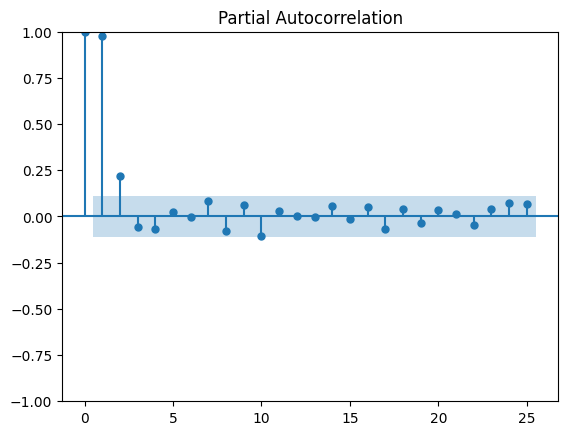

In [103]:
# Gráfica PACF
PACF = plot_pacf(data_close['Close'])

### Pregunta 2 ###
A la vista de las 2 gráficas de autocorrelación, ¿Se aprecian signos de estacionariedad en la serie? ¿Por qué? ¿Se aprecian signos de estacionalidad? ¿Por qué?

***Respuesta:***

A partir del gráfico ACF se observa que las autocorrelaciones decrecen lentamente, lo que indica que la serie no es estacionaria, ya que presenta una fuerte dependencia temporal y probablemente acumula ruido, impidiendo que tenga media y varianza constantes. Por otro lado, el gráfico PACF no muestra picos significativos ni patrones periódicos fuera del intervalo de confianza, lo cual sugiere que la serie no presenta estacionalidad evidente.

Ahora mediante un test de Dickey Fuller aumentado, realizamos la última comprobación de estacionariedad de la serie.

In [104]:
# Test de Dickey Fuller Aumentado
result = adfuller(data_close['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.4029588977517948
p-value: 0.5808567665335324


### Pregunta 3 ###
Según el test realizado, ¿es estacionaria la serie?

***Respuesta:***

El valor-p es mayor que 0.05, por lo tanto, no se puede rechazar la hipótesis nula del test ADF, que plantea que la serie tiene una raíz unitaria, es decir, no es estacionaria.

Seguimos con el analisis y para ello vamos a tratar de modelar la serie con un suavizado exponencial y predecir con este modelo algunos de los puntos finales de la serie. En primer lugar, el alumno debe escoger, teniendo en cuenta lo aprendido en el analisis realizado hasta aquí, el modelo adecuado de suavizado exponencial. A continuación, utilizará todos los datos excepto los 30 últimos días de la serie, y modelará el suavizado con dichos datos. Con este modelo, debe predecir los 30 valores restantes y por último, debe mostrar en una misma gráfica: la serie original en un color hasta el punto donde comienzan los datos de validación (30 últimos puntos), los 30 últimos puntos de la serie original en otro color y, por último, en un tercer color, los puntos predichos por el modelo de suavizado.

In [105]:
# Separar en conjunto de entrenamiento y validación 
close_test = data_close['Close'][-30:]
close_train = data_close['Close'][:-30]

In [107]:
# Crear y ajustar el modelo de suavizado escogido
model_holt = ExponentialSmoothing(close_train, trend='add')
model_holt = model_holt.fit(smoothing_level=0.3, smoothing_trend=0.3)

In [108]:
# Predecir los datos validación
alphas = [0.1, 0.3, 0.5, 0.8]
betas = [0.01, 0.1, 0.3]

for alpha in alphas:
  for beta in betas:
    model_holt = ExponentialSmoothing(close_train, trend='add')
    model_holt = model_holt.fit(smoothing_level=alpha, smoothing_trend=beta)
    pred_holt = model_holt.forecast(30)
    mse = mean_squared_error(close_test, pred_holt)
    print(f"Alpha: {alpha}, Beta: {beta}, MSE: {mse}")

Alpha: 0.1, Beta: 0.01, MSE: 154.34086386421365
Alpha: 0.1, Beta: 0.1, MSE: 1092.7368102051164
Alpha: 0.1, Beta: 0.3, MSE: 1864.4040406561987
Alpha: 0.3, Beta: 0.01, MSE: 287.86983273508264
Alpha: 0.3, Beta: 0.1, MSE: 770.7448483190441
Alpha: 0.3, Beta: 0.3, MSE: 137.38886474611826
Alpha: 0.5, Beta: 0.01, MSE: 283.5474193709293
Alpha: 0.5, Beta: 0.1, MSE: 570.6429751691863
Alpha: 0.5, Beta: 0.3, MSE: 178.47669426840227
Alpha: 0.8, Beta: 0.01, MSE: 273.5065883494122
Alpha: 0.8, Beta: 0.1, MSE: 491.09751604594226
Alpha: 0.8, Beta: 0.3, MSE: 177.62173853823887


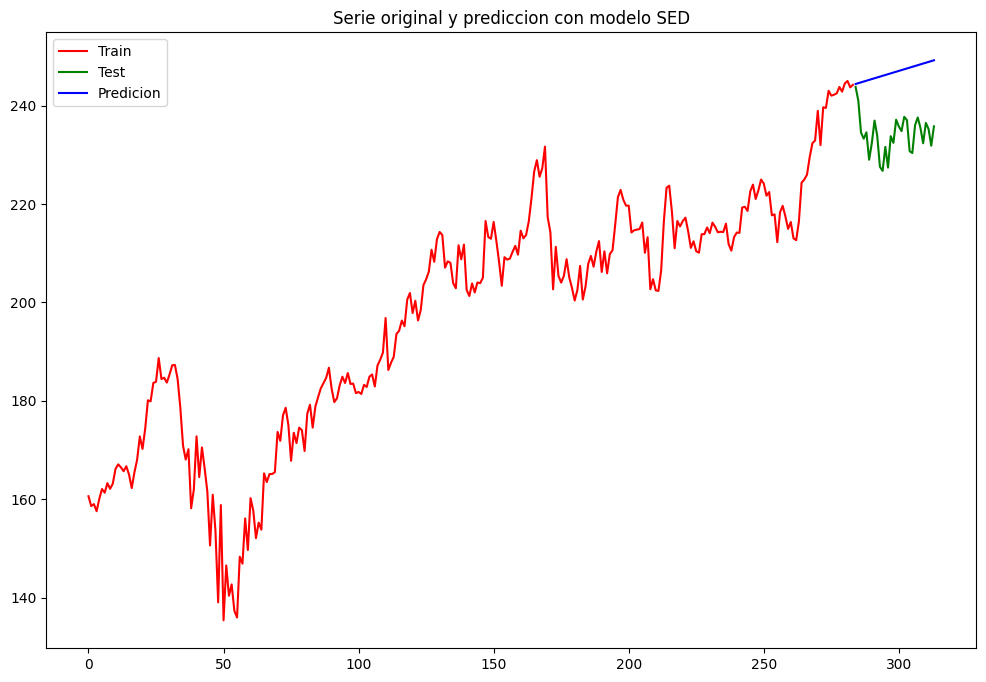

In [111]:
# Mostrar en gráfico los resultados y la serie original.
plt.figure(figsize=(12, 8))
plt.plot(close_train, label='Train', color='red')
plt.plot(close_test, label='Test', color='green')
plt.plot(pred_holt, label='Predicion', color='blue')
plt.title('Serie original y prediccion con modelo SED')
plt.legend()
plt.show()

### Pregunta 4 ###
¿Qué tipo de suavizado exponencial se ha empleado y por qué?

***Respuesta:***

Se ha optado por utilizar el suavizado exponencial doble debido a las características observadas en la serie temporal. En particular, la serie presenta una tendencia clara a lo largo del tiempo, lo que hace necesario un modelo que sea capaz de capturar y ajustar esa evolución progresiva. Sin embargo, no se han identificado patrones de estacionalidad, es decir, no se observa un comportamiento que se repita de forma regular en intervalos fijos.

El suavizado exponencial doble, también conocido como modelo de Holt, es adecuado en estos casos porque incorpora dos componentes: uno para el nivel (valor actual de la serie) y otro para la tendencia, permitiendo realizar proyecciones más precisas en presencia de crecimiento o decrecimiento a lo largo del tiempo.

Pasamos ahora a entrenar un modelo autoregresivo para, de nuevo, predecir los 30 últimos valores. En este caso, si en puntos anteriores de esta práctica se hubiera determinado que la serie no es estacionaria, se debe convertir en estacionaria y comprobar que efectivamente lo es después de la transformación. Una vez que sea estacionaria, se ha de seleccionar en base a la función de autocorrelación (ACF) y/o la autocorrelación parcial (PACF) el orden adecuado del modelo autoregresivo (AR).

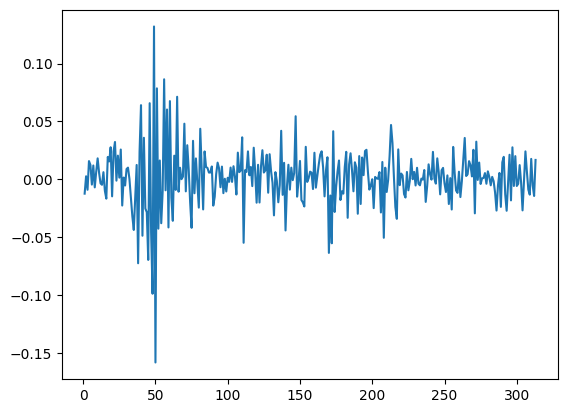

In [112]:
# Transformar la serie en estacionaria en caso de que no lo fuera
data_close['CloseBox'] = np.log(data_close['Close']+1)
data_close['CloseBox'] = np.concatenate([[np.nan], np.diff(data_close['CloseBox'])])
plt.plot(data_close['CloseBox'].dropna())

In [113]:
# Comprobación de estacionariedad
result = adfuller(data_close['CloseBox'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -5.214070830234912
p-value: 8.228779527784789e-06


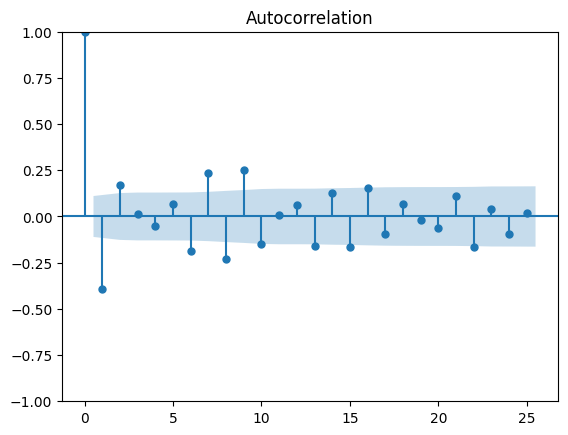

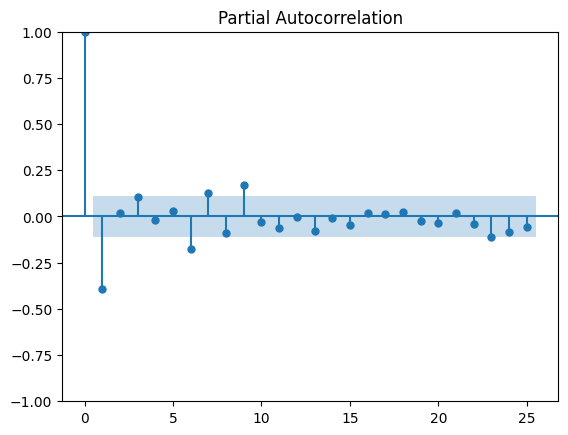

In [114]:
# Mostrar la función de autocorrelación y autocorrelación parcial
ACF = plot_acf(data_close['CloseBox'].dropna())
PACF = plot_pacf(data_close['CloseBox'].dropna())

### Pregunta 5 ###
¿Cual es el orden del modelo autoregresivo que se ha seleccionado y por qué?

***Respuesta:***

El orden del modelo autoregresivo seleccionado corresponde al número de lags significativos que se observan en el gráfico PACF. En este caso, como hay 4 barras que sobrepasan el intervalo de confianza, se ha seleccionado un modelo AR(4). Esto significa que los valores de la serie en los últimos 4 períodos tienen una influencia estadísticamente significativa sobre el valor actual, por lo que incluir estos 4 rezagos permite capturar adecuadamente la dependencia temporal de la serie.

Una vez escogido el orden del modelo autorregresivo, pasamos a entrenar el modelo y a predecir los 30 últimos valores. Por tanto lo primero será, como en ejercicios anteriores, separar por un lado la serie original transformada en estacionaria en caso de que no lo fuera, y eso si, quitandole los últimos 30 puntos. Una vez entrenado, se ha de mostrar el resumen de los parametros del modelo, coeficientes y demás métricas habituales. A continuación, utilizar el modelo para predecir los últimos 30 valores y mostrarlos en un gráfico de lineas junto con la serie original. Antes de pintarlos, en caso de que la serie original haya sido transformada para convertirla en estacionaria, será necesario deshacer las transformaciones de los valores predichos y, ahora si, pintarla junto con los valores de la serie original.

In [115]:
# Separar en conjunto de entrenamiento y validación 
close_test = data_close['CloseBox'][-30:].dropna()
close_train = data_close['CloseBox'][:-30].dropna()

In [121]:
# Crear y ajustar el modelo autorregresivo del orden escogido
orden_ar = 4
modelo_ar = AutoReg(close_train, lags=orden_ar).fit()


C:\Users\pauri\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [120]:
# Mostrar el resumen de los parametros y resultados del entrenamiento del modelo
print(modelo_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:               CloseBox   No. Observations:                  283
Model:                     AutoReg(4)   Log Likelihood                 642.719
Method:               Conditional MLE   S.D. of innovations              0.024
Date:                Wed, 16 Jul 2025   AIC                          -1273.438
Time:                        18:09:42   BIC                          -1251.651
Sample:                             4   HQIC                         -1264.698
                                  283                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0019      0.001      1.283      0.199      -0.001       0.005
CloseBox.L1    -0.3922      0.060     -6.556      0.000      -0.509      -0.275
CloseBox.L2     0.0747      0.064      1.169    

In [122]:
# Predecir los últimos 30 valores utilizando el modelo entrenado
start = len(close_train)
end = start + 29  # 30 valores después del último de entrenamiento

predicciones = modelo_ar.predict(start=start, end=end)
print(predicciones)

283    0.000706
284    0.001141
285    0.001850
286    0.001255
287    0.001626
288    0.001499
289    0.001493
290    0.001542
291    0.001498
292    0.001522
293    0.001515
294    0.001513
295    0.001517
296    0.001514
297    0.001516
298    0.001515
299    0.001515
300    0.001515
301    0.001515
302    0.001515
303    0.001515
304    0.001515
305    0.001515
306    0.001515
307    0.001515
308    0.001515
309    0.001515
310    0.001515
311    0.001515
312    0.001515
dtype: float64


C:\Users\pauri\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\pauri\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [129]:
# Deshacer las transformaciones sobre los valores predichos

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
serie_escalada = scaler.fit_transform(data_close['CloseBox'].dropna().values.reshape(-1, 1))
valores_destransformados = scaler.inverse_transform(predicciones.values.reshape(-1, 1))


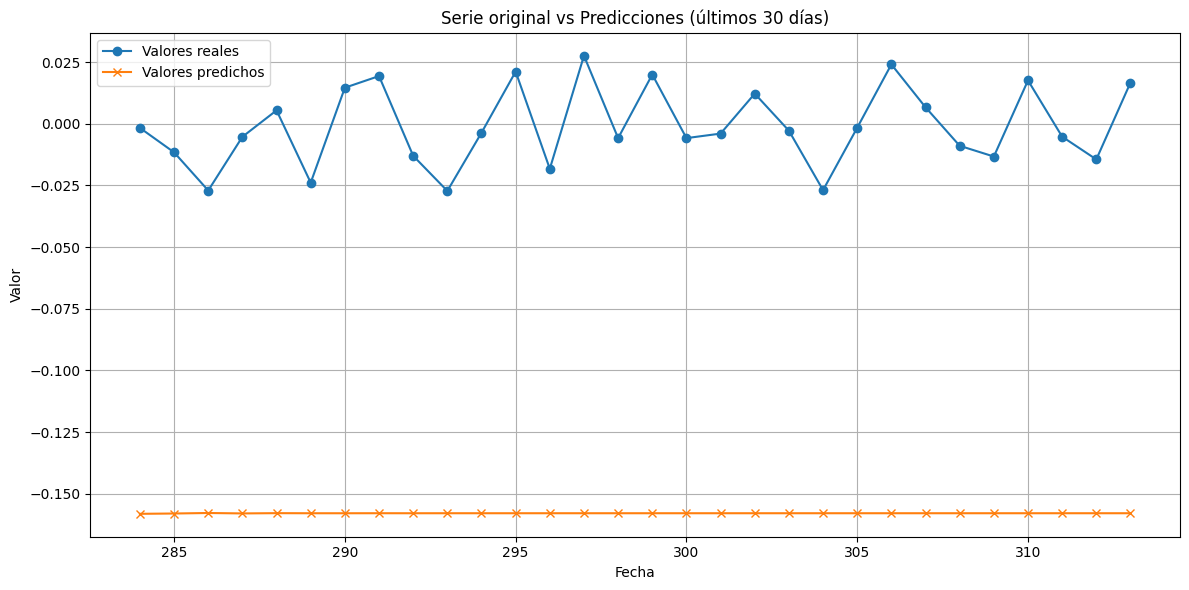

In [ ]:
# Mostrar en gráfica la serie original y los valores predichos
plt.figure(figsize=(12, 6))
plt.plot(close_test.index, close_test.values, label='Valores reales', marker='o')
plt.plot(close_test.index, valores_destransformados, label='Valores predichos', marker='x')

plt.title('Serie original vs Predicciones (últimos 30 días)')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Pregunta 6 ###
A la vista de los resultados obtenidos en el entrenamiento del modelo, ¿qué podemos decir de los residuos y por tanto de la validez estadística del modelo?. En cuanto a la pinta que tiene el resultado final visualizado en el gráfico, ¿Qué conclusiones podemos sacar sobre el modelo? ¿es adecuado para predecir valores futuros de la serie? ¿De qué manera influye en esta valoración el hecho de que hayamos seleccionado para validar los últimos 30 puntos con respecto a la pinta que tendría si solo hubieran sido los últimos 20?

***Respuesta:***

Por último, el alumno debe optimizar el modelo, cambiando el orden de las componentes AR, I y MA del modelo ARIMA, hasta llegar a una combinación que mejore el anterior modelo y que pueda ser incluso utilizable para predecir valores futuros de la serie. Para ello puede optar por realizarlo de forma manual probando distintas combinaciones o mediante algún algoritmo automático que encuentre la mejor combinación de ordenes para el modelo.

In [91]:
# Para el método manual, evaluar la ACF y PACF de la serie estacionaria (transformada si fuera necesario)

In [92]:
# Encontrar los ordenes p y q adecuados para las partes AR y MA

In [93]:
# Aplicar el modelo ARIMA incluyendo los ordenes p y q, pero además incluyendo el orden de diferenciación d

In [94]:
# Predecir y pintar los resultados como en puntos anteriores

### Pregunta 7 ###
Hacer una interpretación libre del modelo entrenado y de los resultados obtenidos. ¿Sería utilizable para predicción de valores futuros de la serie temporal?

***Respuesta:***